In [1]:
%matplotlib inline

import numpy as np
# from bokeh.plotting import figure, show, output_file
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
df_La_Jolla_S = pd.read_csv("csv_data/By-Location/La_Jolla_Campus__S_Parking_Spaces.csv")
df_La_Jolla_S.head()

,year,quarter,parking_spaces,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,peak_empty_spaces,peak_occupied_spaces,%_occupied
0,2000/01,Summer,6474.0,4882.0,4507.0,4149.0,3929.0,4041.0,4104.0,4149.0,4236.0,4387.0,4642.0,3929.0,2545.0,0.39
1,2000/01,Fall,6527.0,3713.0,2842.0,1815.0,1165.0,989.0,935.0,1024.0,1377.0,1738.0,2422.0,935.0,5592.0,0.86
2,2000/01,Winter,7203.0,4196.0,3280.0,2466.0,1881.0,1675.0,1588.0,1622.0,1931.0,2363.0,3060.0,1588.0,5615.0,0.78
3,2000/01,Spring,7205.0,4267.0,3306.0,2570.0,1962.0,1714.0,1636.0,1712.0,2003.0,2354.0,2980.0,1636.0,5569.0,0.77
4,2001/02,Summer,7243.0,5646.0,5228.0,4789.0,4533.0,4603.0,4689.0,4693.0,4751.0,4839.0,5054.0,4533.0,2710.0,0.37


In [11]:
s = ['8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm']
df_temp = df_La_Jolla_S.drop(columns = s, axis = 1)
df_temp = df_temp.loc[(df_temp.year == '2000/01') | (df_temp.year == '2004/05') | (df_temp.year == '2010/11') | (df_temp.year == '2014/15')]

df_temp = df_temp.join(df_La_Jolla_S[s].stack().reset_index(level = 1, drop = True).rename('empty_spaces'))
df_temp = df_temp.reset_index(drop = True)

time_list = [s[i % 10] for i in range(0,160)]
df_temp['time'] = time_list

df_temp['date'] = df_temp['year']+ " " +df_temp['quarter']

In [10]:
len(df_temp)

160

In [4]:
df_temp.head()

,year,quarter,parking_spaces,peak_empty_spaces,peak_occupied_spaces,%_occupied,empty_spaces,time,date
0,2000/01,Summer,6474.0,3929.0,2545.0,0.39,4882.0,8am,2000/01 Summer
1,2000/01,Summer,6474.0,3929.0,2545.0,0.39,4507.0,9am,2000/01 Summer
2,2000/01,Summer,6474.0,3929.0,2545.0,0.39,4149.0,10am,2000/01 Summer
3,2000/01,Summer,6474.0,3929.0,2545.0,0.39,3929.0,11am,2000/01 Summer
4,2000/01,Summer,6474.0,3929.0,2545.0,0.39,4041.0,12pm,2000/01 Summer


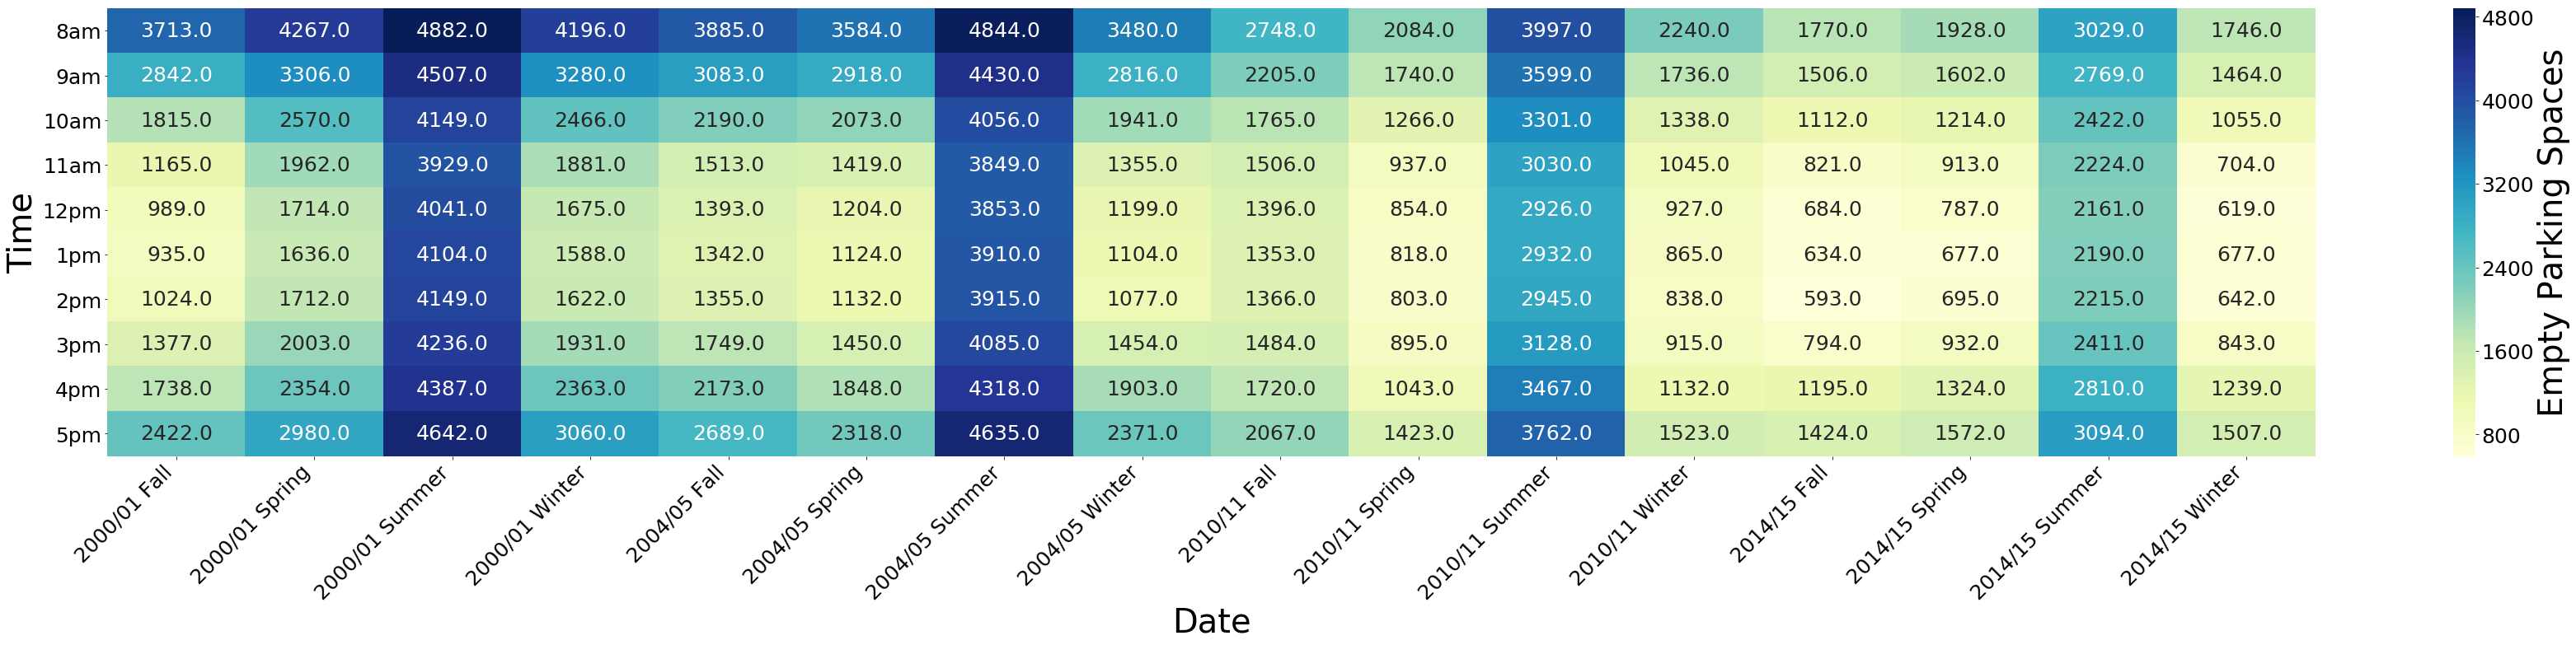

In [36]:
spaces_data = df_temp.pivot('time','date','empty_spaces').reindex(s)
f, ax = plt.subplots(figsize=(60, 10))
ax =sns.heatmap(spaces_data,annot=True,fmt = '.1f', cmap='YlGnBu',ax=ax,cbar_kws={'label': 'Empty Parking Spaces'})
ax.figure.axes[-1].yaxis.label.set_size(40)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right',fontsize = 25)
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right',fontsize = 25)
plt.rcParams['font.size'] = 25
plt.xlabel('Date', fontsize = 40)
plt.ylabel('Time', fontsize = 40)
# plt.savefig('emptyspaces_heatmap_LaJollaCampusS.png')
plt.show()